# Vancouver Crime Data Visualization

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

## Load Dataset

Attribute Information:

- TYPE: The type of crime activities
        - BNE Commercial: (Commercial Break and Enter) Breaking and entering into a commercial property with intent to commit an offence
        - BNE Residential/Other: (Residential Break and Enter) Breaking and entering into a dwelling/house/apartment/garage with intent to commit an offence
        - Vehicle Collision or Pedestrian Struck (with Fatality): Includes primarily pedestrian or cyclist struck and killed by a vehicle. It also includes vehicle to vehicle fatal     accidents, however these incidents are fewer in number when compared to the overall data set. Note: There is no neighbourhood information.
        - Vehicle Collision or Pedestrian Struck (with Injury): Includes all categories of vehicle involved accidents with injuries. This includes pedestrian and cyclist involved incidents with injuries. Note: There is no neighbourhood information
        - Homicide: A person, directly or indirectly, by any means, causes the death of another person.
        - Mischief: A person commits mischief that willfully causes malicious destruction, damage, or defacement of property. This also includes any public mischief towards another person.
        - Offence Against a Person: An attack on a person causing harm that may include usage of a weapon.
        - Other Theft: Theft of property that includes personal items (purse, wallet, cellphone, laptop, etc.), bicycle, etc.
        - Theft from Vehicle: Theft of property from a vehicle
        - Theft of Vehicle: Theft of a vehicle, motorcycle, or any motor vehicle
        - Theft of Bicycle: Theft of a bicycle
- YEAR: A four-digit field that indicates the year when the reported crime activity occurred
- MONTH: A numeric field that indicates the month when the reported crime activity occurred
- DAY: A two-digit field that indicates the day of the month when the reported crime activity occurred
- HOUR: A two-digit field that indicates the hour time (in 24 hours format) when the reported crime activity occurred. Note: This information is based on the findings of the police investigation. No time information will be provided for Offences Against a Person crime type
- MINUTE: A two-digit field that indicates the minute when the reported crime activity occurred. Note: This information is based on the findings of the police investigation. No time information will be provided for Offences Against a Person crime type.
- HUNDRED_BLOCK: Generalized location of the report crime activity. Note: Locations for reported incidents involving Offences Against a Person have been deliberately randomized to several blocks and offset to an intersection. No time or street location name will be provided for these offences. For property related offences, the VPD has provided the location to the hundred block of these incidents within the general area of the block. All data must be considered offset and users should not interpret any locations as related to a specific person or specific property. Coordinates data for records with “Offset to Protect Privacy” was not disclosed to provide privacy protection. X NK_LOC ST is default location value used for incidents with unknown location and is geolocated to 312 Main Street
- NEIGHBOURHOOD: The Vancouver Police Department uses the Statistics Canada definition of neighbourhoods within municipalities. Neighbourhoods within the City of Vancouver are based on the census tract (CT) concept within census metropolitanarea (CMA). The Musqueam Indian Band is located in the southwest corner of the City of Vancouver. There is a service agreement between Musqueam and the City of Vancouver, where the City provides municipal services such as policing. As a result, Musqueam crime data is included with the VPD Open Data.
- X: Coordinate values are projected in UTM Zone 10. All data must be considered offset and users should not interpret any locations as related to a specific person or specific property.
- Y: Coordinate values are projected in UTM Zone 10. All data must be considered offset and users should not interpret any locations as related to a specific person or specific property.

In [2]:
df = pd.read_csv('../input/vancouver-bc-historical-crime-data/crimedata_csv_all_years.csv')
df.columns = map(str.lower, df.columns)
df.head()

,type,year,month,day,hour,minute,hundred_block,neighbourhood,x,y
0,Theft from Vehicle,2006,3,4,20,30,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
1,Theft from Vehicle,2006,3,5,11,30,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
2,Theft from Vehicle,2006,4,16,0,1,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
3,Theft from Vehicle,2006,6,11,17,45,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
4,Theft from Vehicle,2006,8,5,20,0,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06


In [3]:
import pyproj
p = pyproj.Proj("+proj=utm +zone=10, +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

lon, lat = p(df['x'].values, df['y'].values, inverse=True)
latitude, longitude = p(lon, lat)
df2 = pd.DataFrame(np.c_[lat, lon], columns=['Latitude', 'Longitude'])
df2.head()

,Latitude,Longitude
0,49.277803,-123.127194
1,49.277803,-123.127194
2,49.277803,-123.127194
3,49.277803,-123.127194
4,49.277803,-123.127194


In [4]:
df = pd.concat([df, df2], axis=1)
df.head()

,type,year,month,day,hour,minute,hundred_block,neighbourhood,x,y,Latitude,Longitude
0,Theft from Vehicle,2006,3,4,20,30,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06,49.277803,-123.127194
1,Theft from Vehicle,2006,3,5,11,30,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06,49.277803,-123.127194
2,Theft from Vehicle,2006,4,16,0,1,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06,49.277803,-123.127194
3,Theft from Vehicle,2006,6,11,17,45,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06,49.277803,-123.127194
4,Theft from Vehicle,2006,8,5,20,0,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06,49.277803,-123.127194


#### What about Missing Values?

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


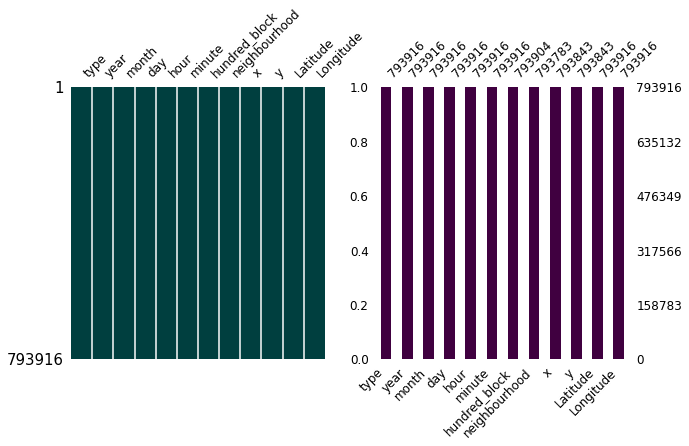

In [5]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
msno.matrix(df, ax=ax1, sparkline=False, fontsize = 12, color=(0., 0.25, 0.25))
msno.bar(df, ax=ax2, fontsize = 12, color=(0.25, 0., 0.25))
plt.show()

# Part 1: Let's look at the trend over 2003-2020

## Total number of crimes throughout the year 2003-2020

Text(0.5, 1.0, 'Total of All Kinds of Crimes over the Years (2003-2020)')

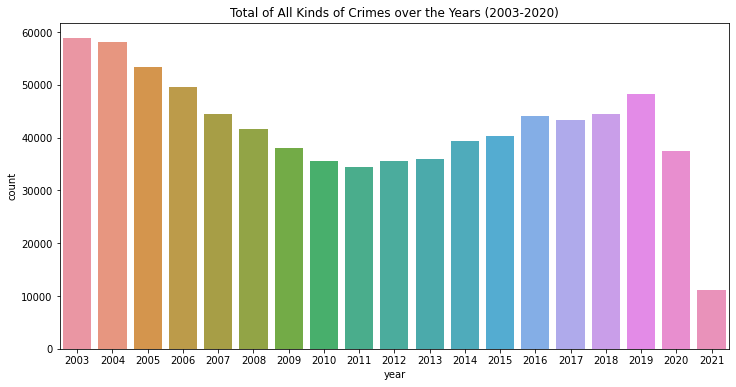

In [6]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="year", data=df)
plt.title('Total of All Kinds of Crimes over the Years (2003-2020)')

## Most frequently occurred crimes throughout 2003-2020

In [7]:
Type = df.type.value_counts().to_frame().reset_index(drop = False)
Type.columns = ['type', 'count']
Type

,type,count
0,Theft from Vehicle,224662
1,Other Theft,192655
2,Mischief,92912
3,Break and Enter Residential/Other,69367
4,Offence Against a Person,67463
5,Break and Enter Commercial,43067
6,Theft of Vehicle,42794
7,Theft of Bicycle,33763
8,Vehicle Collision or Pedestrian Struck (with I...,26647
9,Vehicle Collision or Pedestrian Struck (with F...,306


In [8]:
import bqplot
from palettable.colorbrewer.diverging import *
from altair import Row, Column, Chart, Text, Scale, Color

colors = Spectral_8.hex_colors
colors.reverse()

#plt.title('Which type of crimes occurred most frequently through 2003-2020?')
type_count_chart = Chart(Type).mark_bar().encode(x='count', y='type', color=Color('type', scale=Scale(range=colors)))
display(type_count_chart)

alt.Chart(...)

## Neighborhoods where most crimes took place

In [9]:
neigh = df.neighbourhood.value_counts().to_frame().reset_index(drop = False)
neigh.columns = ['neighborhood', 'count']
neigh

,neighborhood,count
0,Central Business District,210309
1,West End,71750
2,Strathcona,50183
3,Mount Pleasant,49733
4,Fairview,49668
5,Grandview-Woodland,45319
6,Renfrew-Collingwood,41445
7,Kitsilano,39779
8,Kensington-Cedar Cottage,37955
9,Hastings-Sunrise,27869


In [10]:
import bqplot
from palettable.colorbrewer.diverging import *
from altair import Row, Column, Chart, Text, Scale, Color

colors = Spectral_8.hex_colors
colors.reverse()

plt.figure(figsize=(18, 8))
neigh_count_chart = Chart(neigh).mark_bar().encode(x='count',y='neighborhood', color=Color('neighborhood', scale=Scale(range=colors)))
display(neigh_count_chart)
plt.show()

alt.Chart(...)

<Figure size 1296x576 with 0 Axes>

## Yearly trend of total number of crimes over the years 2003-2020

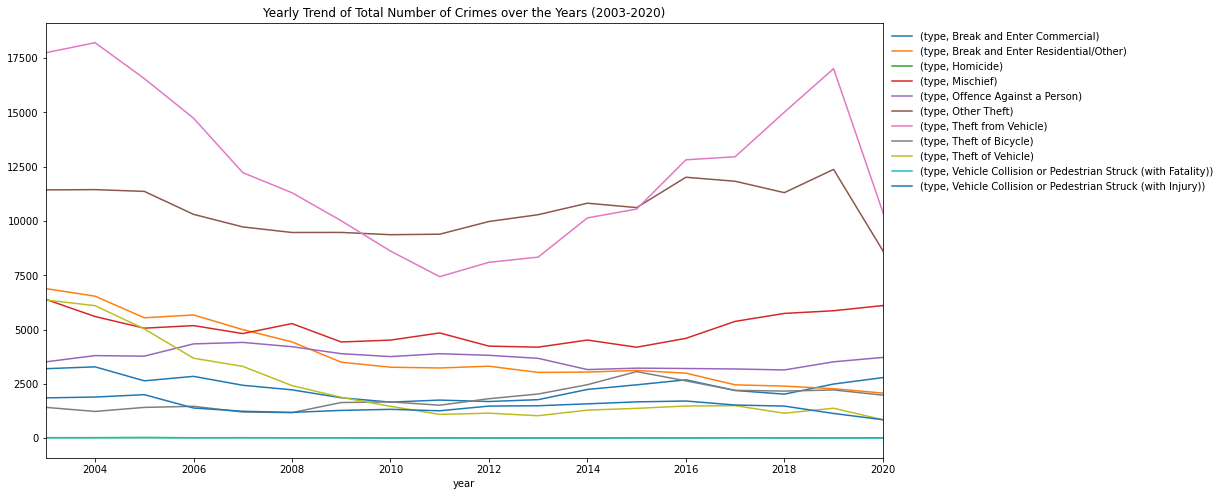

In [11]:
# plot data
fig, ax = plt.subplots(figsize=(15, 8))
df.groupby(['year', 'type']).agg({'type':'count'}).unstack().plot(ax=ax)
plt.title('Yearly Trend of Total Number of Crimes over the Years (2003-2020)')
plt.xlim(2003, 2020)
plt.legend(loc='best', frameon = False, bbox_to_anchor=(1, 1))

## Month-wise total of crimes over the years 2003-2020

Text(0.5, 1.0, 'Monthly trend of Total Number of Crimes over the Years (2003-2020)')

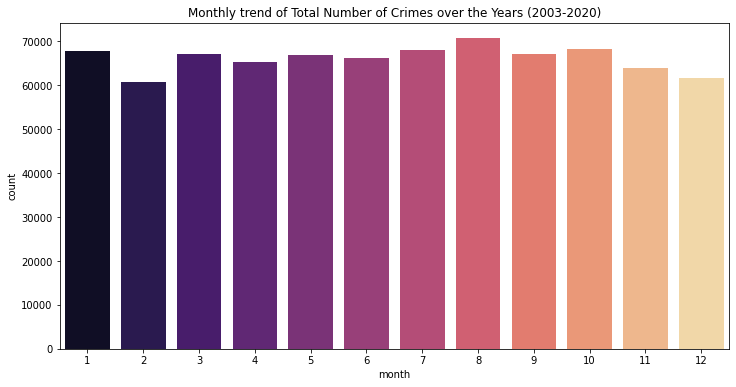

In [12]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="month", data=df, palette= 'magma')
plt.title('Monthly trend of Total Number of Crimes over the Years (2003-2020)')

## Day-wise total of crimes over the years 2003-2020

Text(0.5, 1.0, 'Dayly Trend of Total Number of Crimes over the Years (2003-2020)')

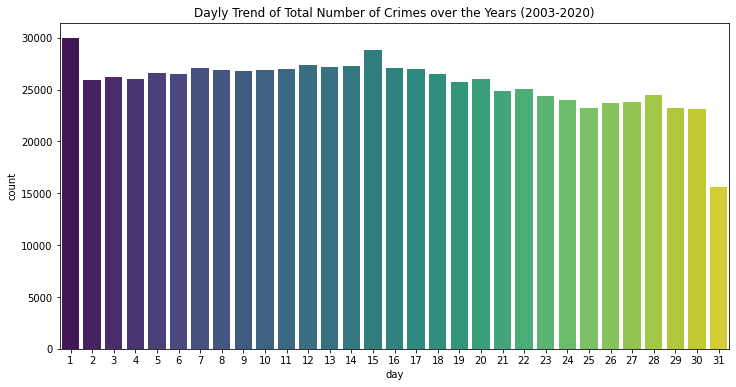

In [13]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="day", data=df, palette= 'viridis')
plt.title('Dayly Trend of Total Number of Crimes over the Years (2003-2020)')

## Hour-wise total of crimes over the years 2003-2020

Text(0.5, 1.0, 'Hourly Trend of Total Number of Crimes over the Years (2003-2020)')

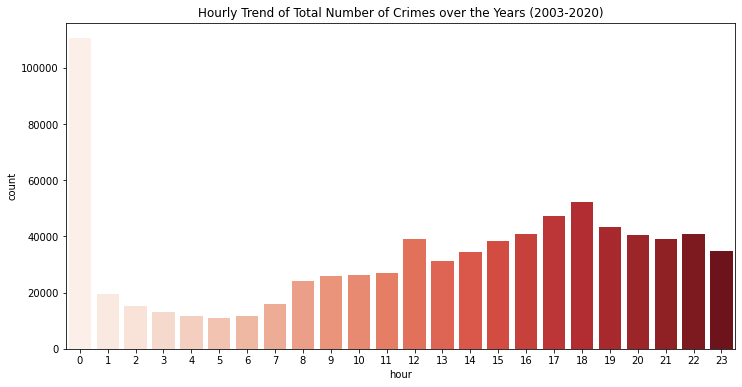

In [14]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="hour", data=df, palette= 'Reds')
plt.title('Hourly Trend of Total Number of Crimes over the Years (2003-2020)')

# Part 2: Let's look at the crime data for 2020

## Which crimes occurred the most in 2020?

Text(0.5, 1.0, 'Number of Different Kinds of Crimes in 2020')

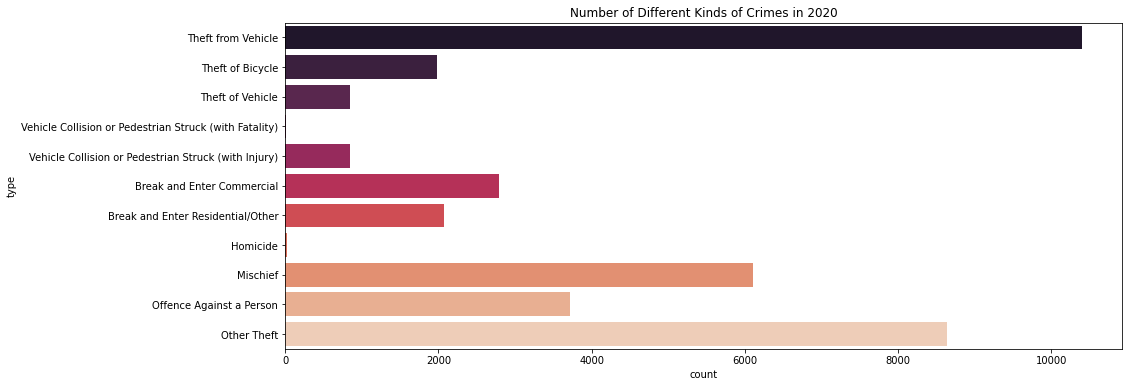

In [15]:
df_2020 = df[df.year == 2020]
plt.figure(figsize=(15, 6))
ax = sns.countplot(y="type", data=df_2020, palette = 'rocket' )
plt.title('Number of Different Kinds of Crimes in 2020')

## Monthly trend of different types of crimes during 2020

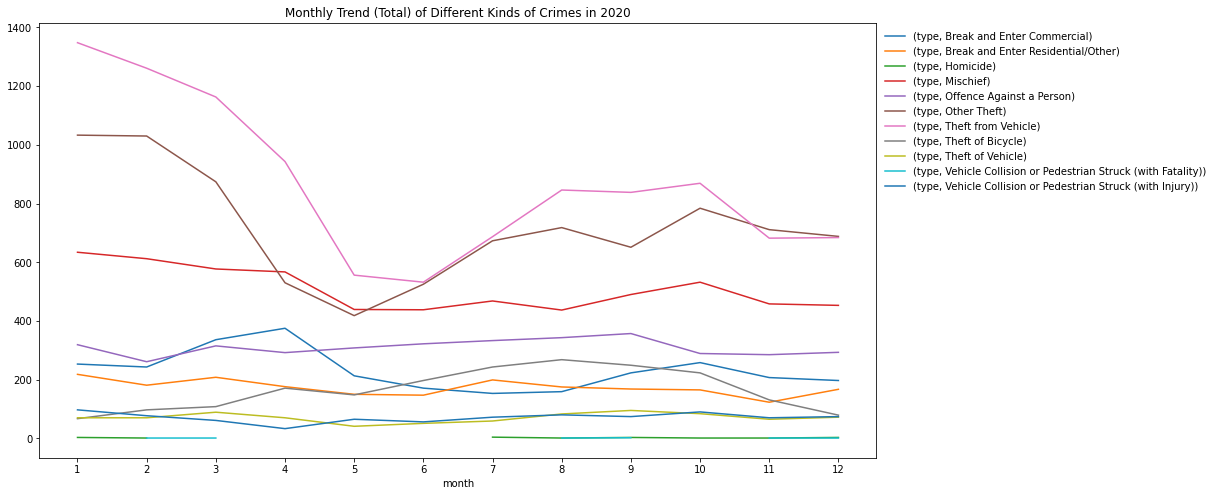

In [16]:
# plot data
fig, ax = plt.subplots(figsize=(15, 8))
df_2020.groupby(['month', 'type']).agg({'type':'count'}).unstack().plot(ax=ax)
plt.legend(loc='best', frameon = False, bbox_to_anchor=(1, 1))
plt.xticks((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12))
plt.title('Monthly Trend (Total) of Different Kinds of Crimes in 2020')
plt.show()

## Daily trend of different types of crimes during 2020

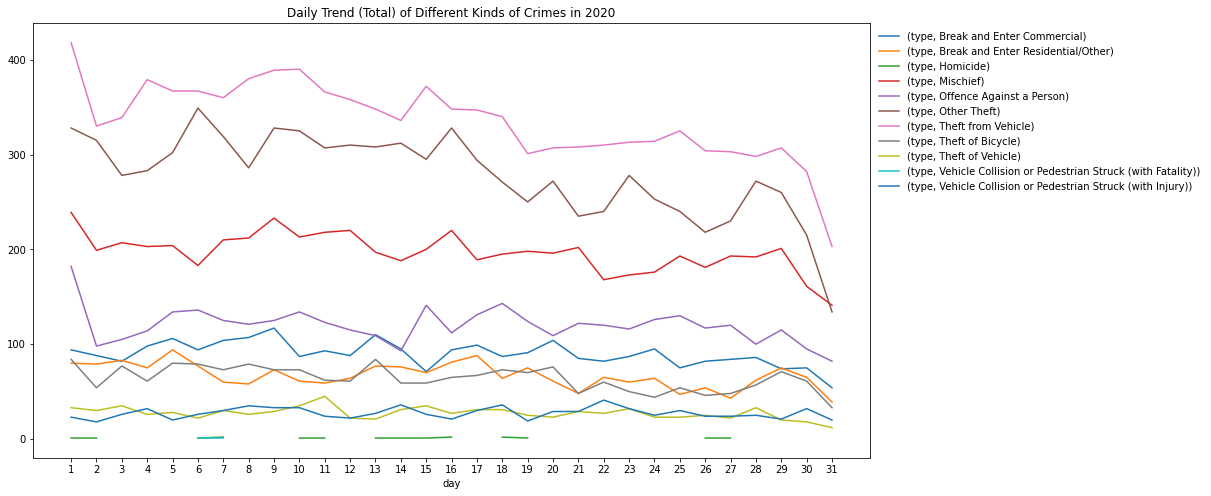

In [17]:
# plot data
fig, ax = plt.subplots(figsize=(15, 8))
df_2020.groupby(['day', 'type']).agg({'type':'count'}).unstack().plot(ax=ax)
plt.xticks((1,2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31))
plt.legend(loc='best', frameon = False, bbox_to_anchor=(1, 1))
plt.title('Daily Trend (Total) of Different Kinds of Crimes in 2020')
plt.show()

## Hourly trend of different types of crimes during 2020

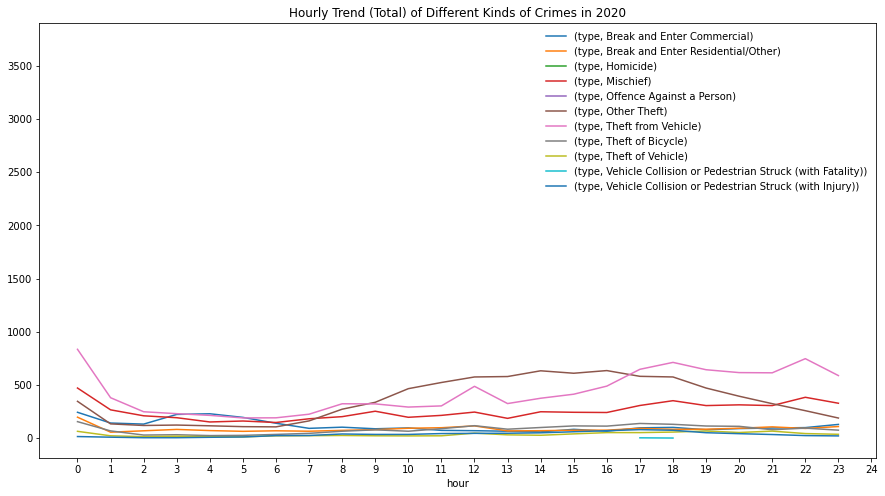

In [18]:
# plot data
fig, ax = plt.subplots(figsize=(15,8))
df_2020.groupby(['hour', 'type']).agg({'type':'count'}).unstack().plot(ax=ax)
plt.xticks((0, 1,2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24))
plt.legend(loc='best', frameon = False, bbox_to_anchor=(1, 1))
plt.title('Hourly Trend (Total) of Different Kinds of Crimes in 2020')
plt.show()

## Total Number of Crimes in Different Neighbourhoods in 2020

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'Central Business District'),
  Text(1, 0, 'West End'),
  Text(2, 0, 'West Point Grey'),
  Text(3, 0, 'Renfrew-Collingwood'),
  Text(4, 0, 'Victoria-Fraserview'),
  Text(5, 0, 'Kensington-Cedar Cottage'),
  Text(6, 0, 'Kitsilano'),
  Text(7, 0, 'Dunbar-Southlands'),
  Text(8, 0, 'Hastings-Sunrise'),
  Text(9, 0, 'Strathcona'),
  Text(10, 0, 'Fairview'),
  Text(11, 0, 'Mount Pleasant'),
  Text(12, 0, 'Riley Park'),
  Text(13, 0, 'Grandview-Woodland'),
  Text(14, 0, 'Killarney'),
  Text(15, 0, 'Sunset'),
  Text(16, 0, 'Marpole'),
  Text(17, 0, 'Shaughnessy'),
  Text(18, 0, 'Kerrisdale'),
  Text(19, 0, 'South Cambie'),
  Text(20, 0, 'Oakridge'),
  Text(21, 0, 'Stanley Park'),
  Text(22, 0, 'Arbutus Ridge'),
  Text(23, 0, 'Musqueam')])

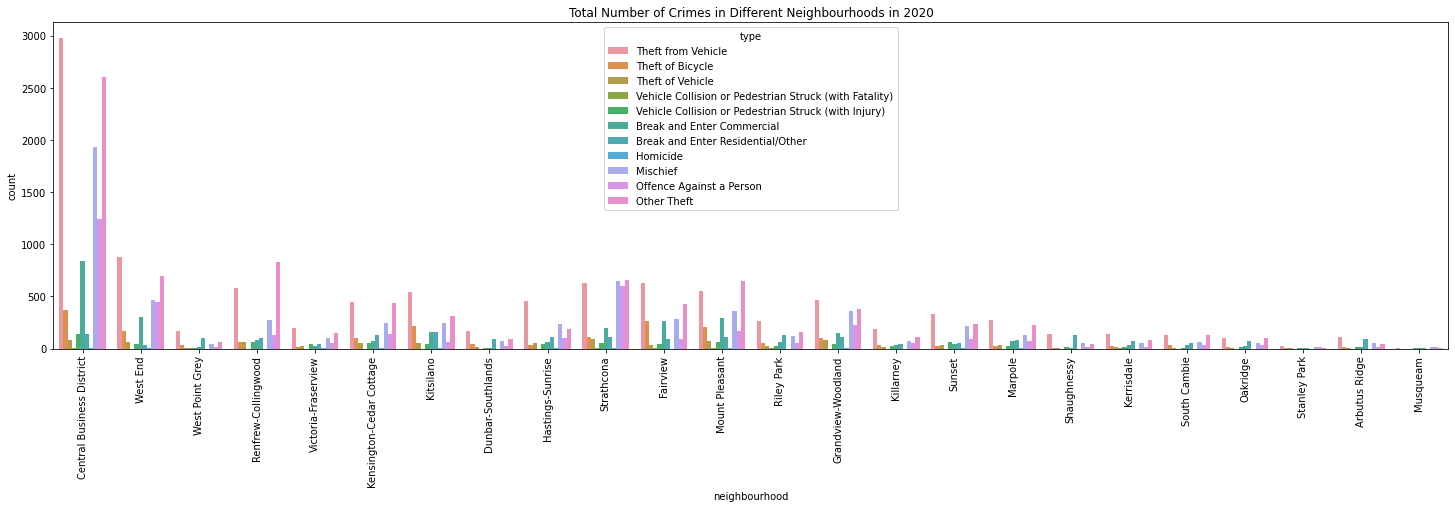

In [19]:
plt.figure(figsize=(25, 6))
ax = sns.countplot(x="neighbourhood", data=df_2020 , hue= 'type')
plt.title('Total Number of Crimes in Different Neighbourhoods in 2020')
plt.xticks(rotation=90)

# Part 3: Let's focus on last month October 2020

## Let's look at the most frequntly occurred crimes first

In [20]:
oct_2020 = df_2020[(df_2020.month == 10)]

frequent_oct_2020 = oct_2020.type.value_counts().to_frame().reset_index(drop = False)
frequent_oct_2020.columns = ['type', 'count']
frequent_oct_2020 = frequent_oct_2020.nlargest(4, "count") 

type_oct_2020 = list(frequent_oct_2020.type.values)
oct_2020_type = oct_2020[oct_2020['type'].isin(type_oct_2020)]

frequent_oct_2020

,type,count
0,Theft from Vehicle,869
1,Other Theft,784
2,Mischief,532
3,Offence Against a Person,289


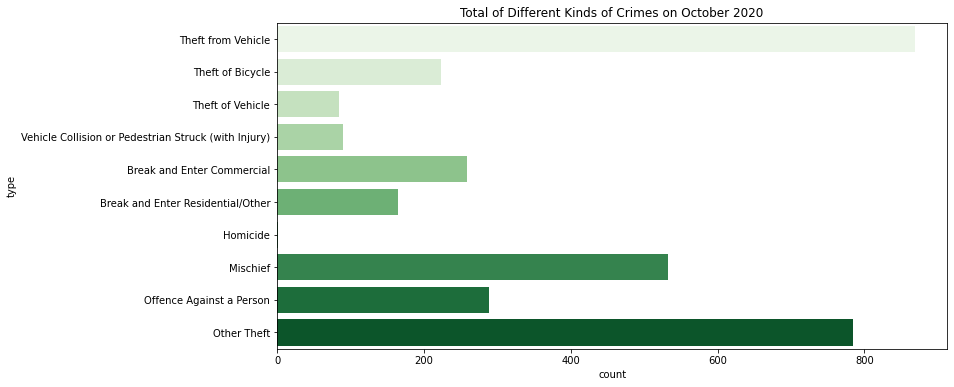

In [21]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(y="type", data=oct_2020, palette = 'Greens')
plt.title('Total of Different Kinds of Crimes on October 2020')
plt.show()

## Offence Against a Person

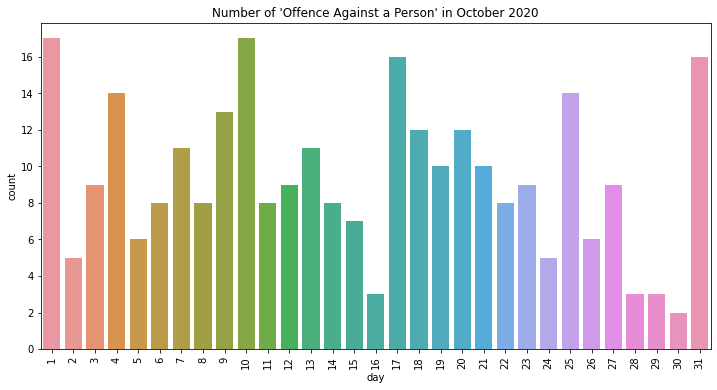

In [22]:
off_2020_oct = oct_2020_type[oct_2020_type.type == 'Offence Against a Person']

plt.figure(figsize=(12, 6))
ax = sns.countplot(x="day", data=off_2020_oct)
plt.title('Number of \'Offence Against a Person\' in October 2020')
plt.xticks(rotation=90)
plt.show()

## Where these 4 types of crimes took place?

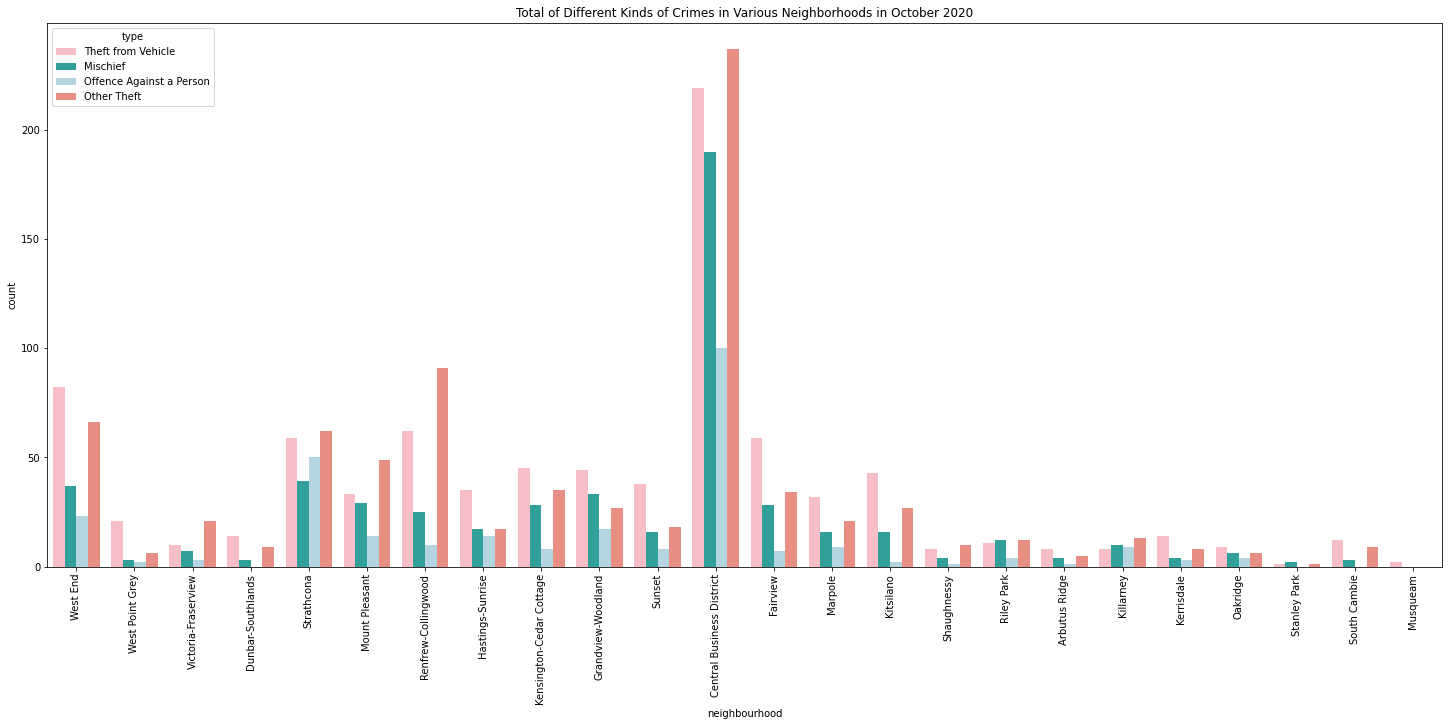

In [23]:
plt.figure(figsize=(25, 10))
ax = sns.countplot(x="neighbourhood", data=oct_2020_type , hue= 'type', palette=["lightpink", "lightseagreen", 'lightblue', 'salmon'])
plt.title('Total of Different Kinds of Crimes in Various Neighborhoods in October 2020')
plt.xticks(rotation=90)
plt.show()

## Let's look at the stripplot to see the day and time of occurance of the 4 types of crimes

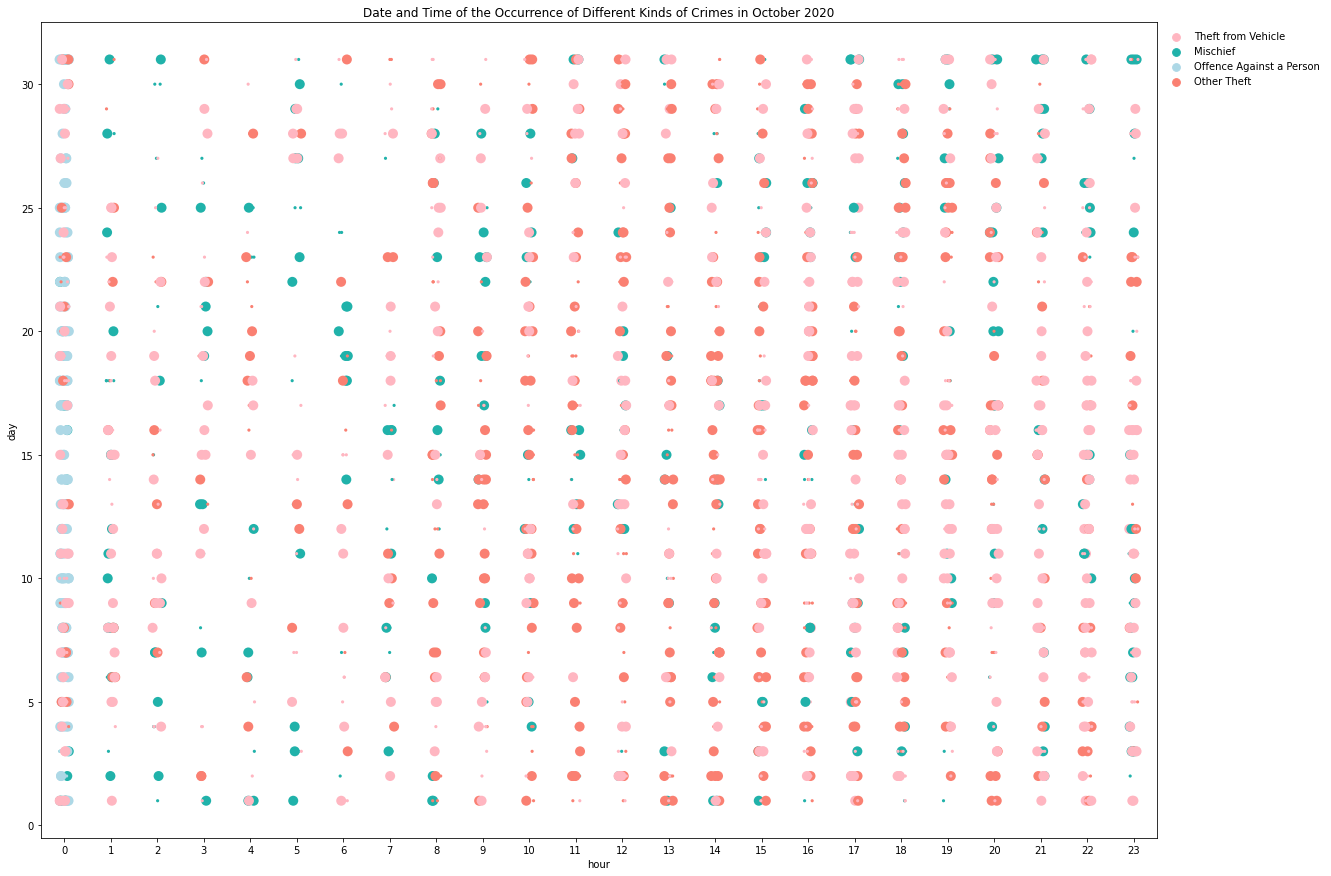

In [24]:
plt.figure(figsize=(20, 15))
sns.stripplot(
    data=oct_2020_type, x="hour", y="day", hue = 'type',
    sizes=(10, 100),  palette=["lightpink", "lightseagreen", 'lightblue', 'salmon'])
plt.title('Date and Time of the Occurrence of Different Kinds of Crimes in October 2020')
plt.legend(loc='best', frameon = False, bbox_to_anchor=(1, 1))
plt.show()

## Which neighbourhoods were more prone to criminal acts in October 2020?

In [25]:
frequent_oct_2020_n = oct_2020.neighbourhood.value_counts().to_frame().reset_index(drop = False)
frequent_oct_2020_n.columns = ['neighbourhood', 'count']
frequent_oct_2020_n = frequent_oct_2020_n.nlargest(4, "count") 

neigh_oct_2020 = list(frequent_oct_2020_n.neighbourhood.values)
oct_2020_neigh = oct_2020_type[oct_2020_type['neighbourhood'].isin(neigh_oct_2020)]

frequent_oct_2020_n

,neighbourhood,count
0,Central Business District,909
1,West End,278
2,Strathcona,255
3,Renfrew-Collingwood,217


## Let's look at the day and time of the crimes in Central Business District

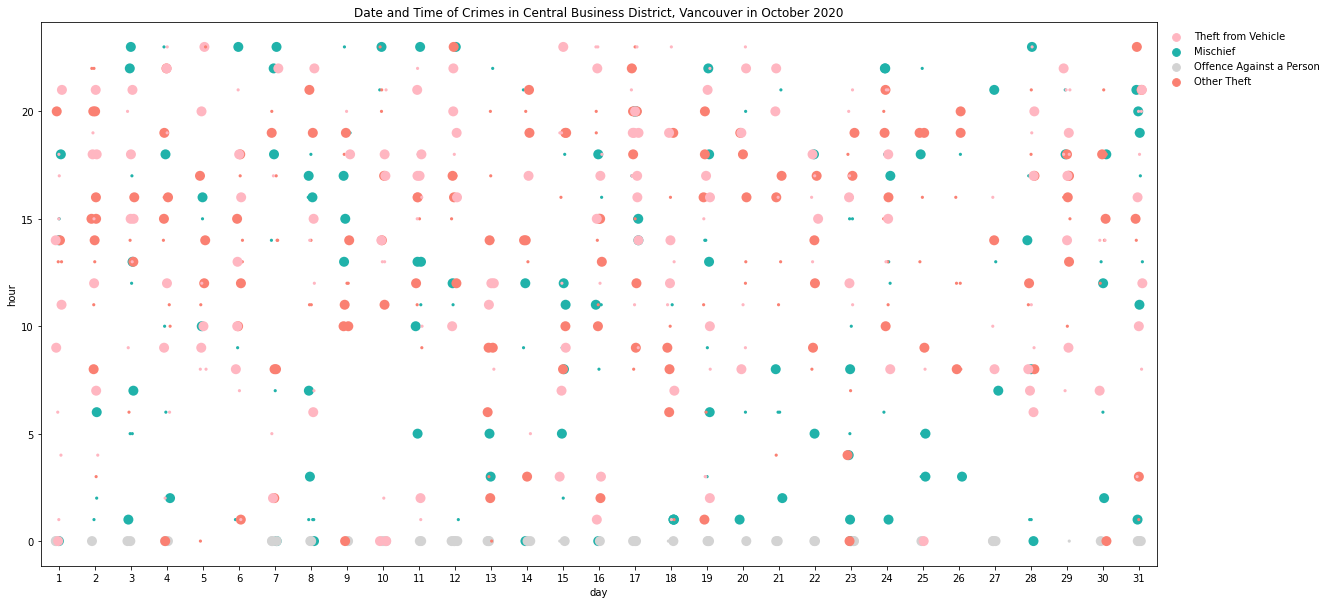

In [26]:
CBD_2020_oct = oct_2020_type[oct_2020_type.neighbourhood == 'Central Business District']

plt.figure(figsize=(20, 10))
sns.stripplot(
    data=CBD_2020_oct, x="day", y="hour", hue = 'type',
    sizes=(10, 100),  palette=["lightpink", "lightseagreen", 'lightgray', 'salmon'])
plt.title('Date and Time of Crimes in Central Business District, Vancouver in October 2020')
plt.legend(loc='best', frameon = False, bbox_to_anchor=(1, 1))
plt.show()

## What about West End?

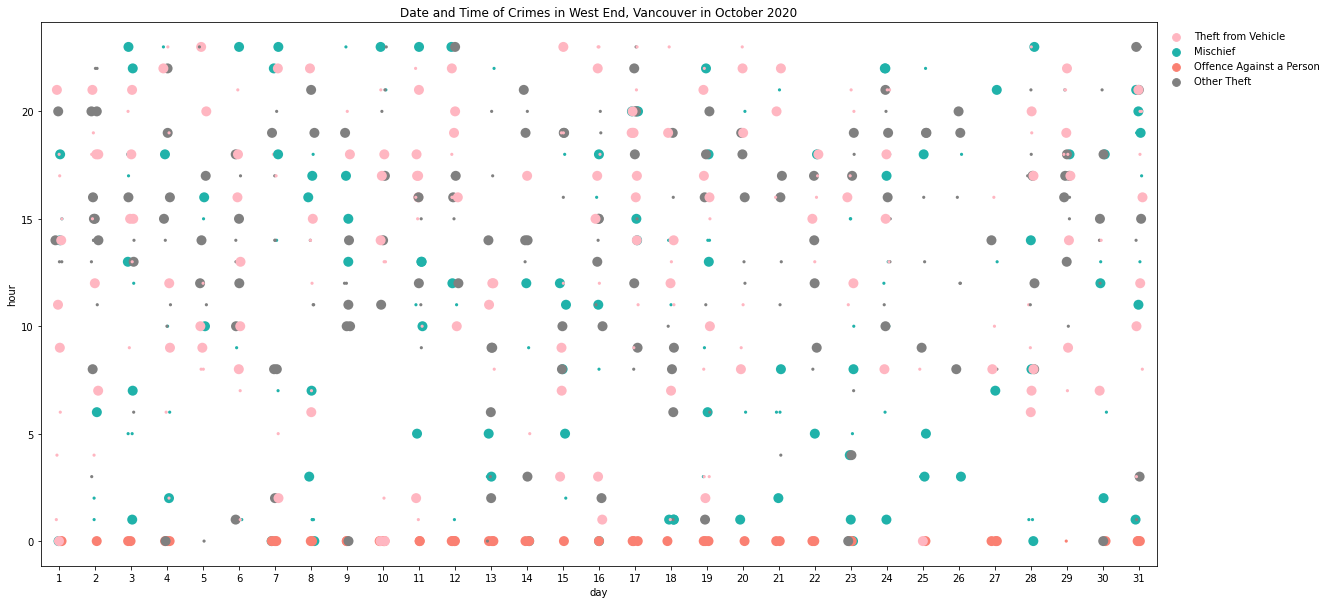

In [27]:
WE_2020_oct = oct_2020_type[oct_2020_type.neighbourhood == 'West End']

plt.figure(figsize=(20, 10))
sns.stripplot(
    data=CBD_2020_oct, x="day", y="hour", hue = 'type',
    sizes=(10, 100),  palette=["lightpink", "lightseagreen", 'salmon', 'gray'])
plt.title('Date and Time of Crimes in West End, Vancouver in October 2020')
plt.legend(loc='best', frameon = False, bbox_to_anchor=(1, 1))
plt.show()

## What about Sunset? 

### I'm interested to rent in this neighbourhood. So let's look closely here.

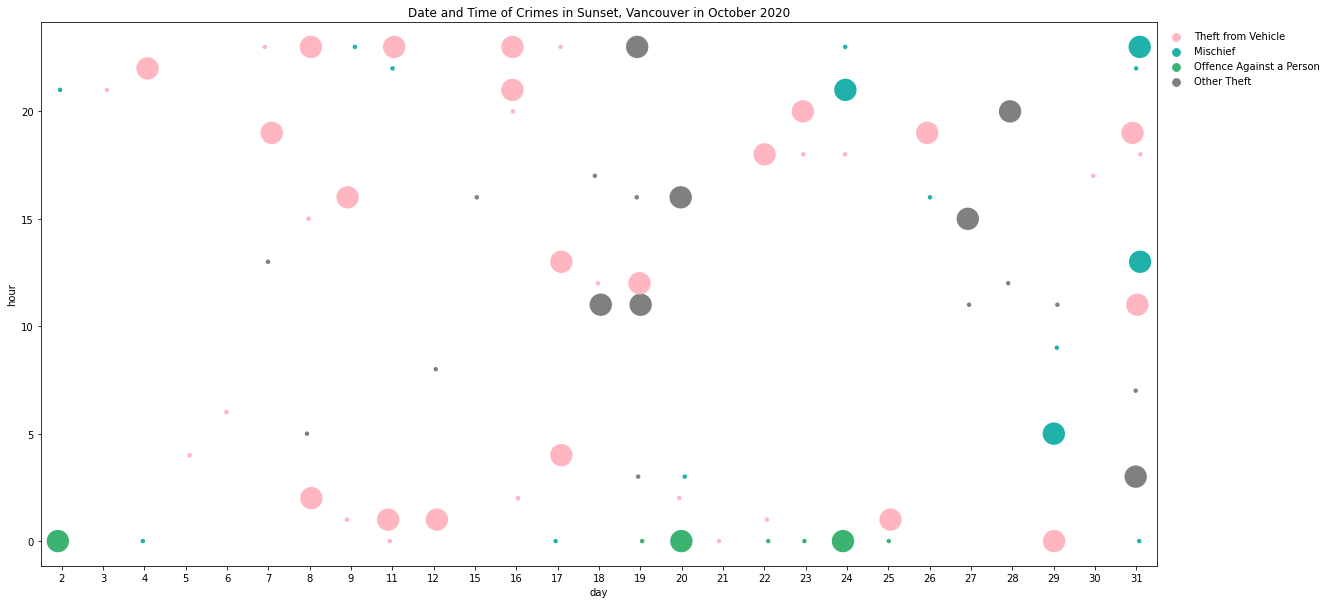

In [28]:
Sun_2020_oct = oct_2020_type[oct_2020_type.neighbourhood == 'Sunset']

plt.figure(figsize=(20, 10))
sns.stripplot(
    data=Sun_2020_oct, x="day", y="hour", hue = 'type',
    sizes=(20, 500),  palette=["lightpink", "lightseagreen", 'mediumseagreen', 'gray'])
plt.title('Date and Time of Crimes in Sunset, Vancouver in October 2020')
plt.legend(loc='best', frameon = False, bbox_to_anchor=(1, 1))
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


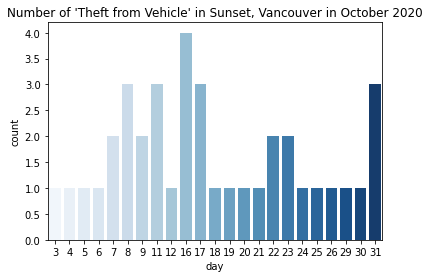

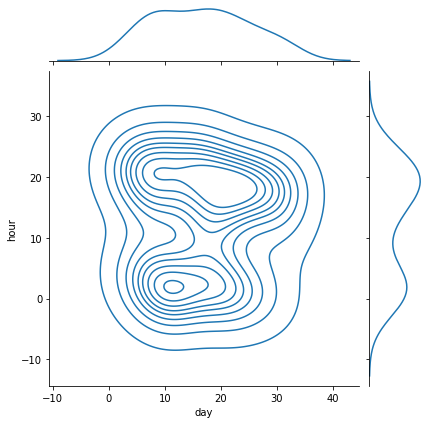

In [29]:
tfv_2020_oct = Sun_2020_oct[Sun_2020_oct.type == 'Theft from Vehicle']

plt.figure(figsize=(6, 4))
ax = sns.countplot(x="day", data=tfv_2020_oct, palette= 'Blues')
plt.title('Number of \'Theft from Vehicle\' in Sunset, Vancouver in October 2020')

sns.jointplot('day', "hour", tfv_2020_oct, kind='kde', height=6)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


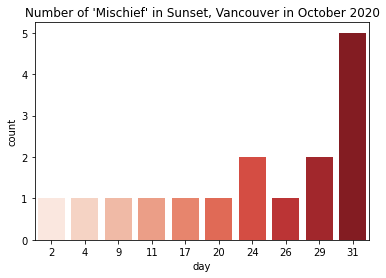

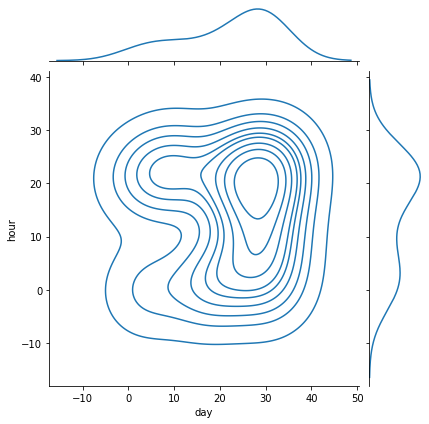

In [30]:
mis_2020_oct = Sun_2020_oct[Sun_2020_oct.type == 'Mischief']

plt.figure(figsize=(6, 4))
ax = sns.countplot(x="day", data=mis_2020_oct, palette= 'Reds')
plt.title('Number of \'Mischief\' in Sunset, Vancouver in October 2020')

sns.jointplot('day', "hour", mis_2020_oct, kind='kde', height=6)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


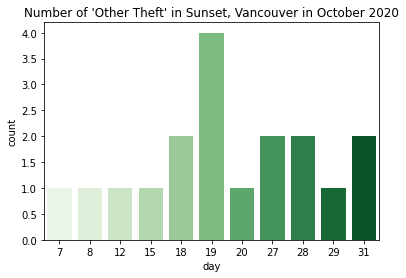

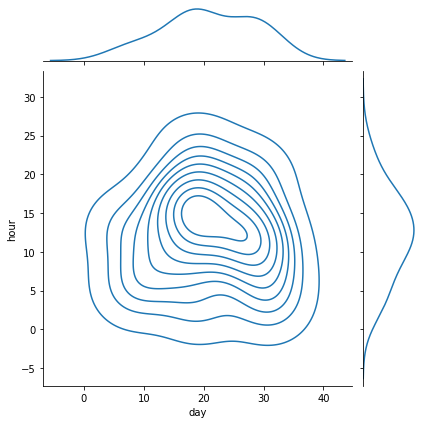

In [31]:
ot_2020_oct = Sun_2020_oct[Sun_2020_oct.type == 'Other Theft']

plt.figure(figsize=(6, 4))
ax = sns.countplot(x="day", data=ot_2020_oct, palette= 'Greens')
plt.title('Number of \'Other Theft\' in Sunset, Vancouver in October 2020')

sns.jointplot('day', "hour", ot_2020_oct, kind='kde', height=6)
plt.show()

## Let's look at the location of 'Theft from Vehicle' in Sunset in October 2020

In [32]:
import folium
from folium.plugins import *
from folium import plugins

### We'll write a function to plot the map with crime for every neighborhood

In [33]:
neighborhood = list(df.neighbourhood.unique())

In [34]:
df = df.dropna()
df = df[(df['Latitude'] != 0) & (df['Longitude'] != 0)]

def map(neigh):

    # Create a dataset of vehicle thefts in 2017
    tfv2020_oct_sunset =  df[(df['year'] == 2020) & (df['month'] == 10) & (df['neighbourhood'] == neigh) & (df['type'] == "Theft from Vehicle")]

    # Create a map centered on Vancouver
    map_van = folium.Map(location= [49.24, -123.11], zoom_start = 12)

    # Create a list with lat and long values and add the list to a heat map, then show map
    heat_data = [[row['Latitude'],row['Longitude']] for index, row in tfv2020_oct_sunset.iterrows()]
    HeatMap(heat_data).add_to(map_van)

    # instantiate a feature group for the incidents in the dataframe
    incidents = folium.map.FeatureGroup()

    # loop through the 100 crimes and add each to the incidents feature group
    for lat, lng, in zip(tfv2020_oct_sunset.Latitude, tfv2020_oct_sunset.Longitude):
        incidents.add_child(
            folium.CircleMarker(
                [lat, lng],
                radius=5, # define how big you want the circle markers to be
                color='gray',
                fill=True,
                fill_color='red',
                fill_opacity=0.6
            )
        )
    
    map_van.add_child(incidents)

    # instantiate a mark cluster object for the incidents in the dataframe
    incident = plugins.MarkerCluster().add_to(map_van)

    # loop through the dataframe and add each data point to the mark cluster
    for lat, lng, label, in zip(tfv2020_oct_sunset.Latitude, tfv2020_oct_sunset.Longitude, tfv2020_oct_sunset.hundred_block):
        folium.Marker(
            location=[lat, lng],
            icon=None,
            popup=label,
        ).add_to(incident)

    # add incidents to map
    map_van.add_child(incident)
    return map_van

In [35]:
map ('Marpole')

In [36]:
map ('West End')

In [37]:
map ('West Point Grey')

In [38]:
map ('Mount Pleasant')

In [39]:
map ('Sunset')

#### Remark: We can use this code in similar way to find out more detail about the time and date or neighborhood where the criminal act took place.

### Thanks for looking! Was it helpful at all? 